# 1. Importar los archivos y revisar los datos


In [27]:
import os
import pandas as pd

# Ruta base
BASE = r"C:\Users\malej\OneDrive\Senior Data Scientists Tati & Bri\Triple Ten Proyectos\Sprints\Sprint 8 DA 56 Brian Marulanda"

# Nombres de archivos actualizados
path_01 = os.path.join(BASE, "moved_project_sql_result_01.csv")
path_04 = os.path.join(BASE, "moved_project_sql_result_04.csv")
path_07 = os.path.join(BASE, "moved_project_sql_result_07.csv")

# Cargar datasets usando las rutas ya definidas
dfs = {}
for p, name in zip([path_01, path_04, path_07], ['df01', 'df04', 'df07']):
    if os.path.isfile(p):
        dfs[name] = pd.read_csv(p)
    else:
        print(f"Archivo no encontrado: {p}")

# Asignar los DataFrames si existen
df01 = dfs.get('df01')
df04 = dfs.get('df04')
df07 = dfs.get('df07')

# Vista rápida de los datos
display(df01.head())
display(df04.head())
display(df07.head())

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


# 2. Verificar y ajustar tipos de datos

In [28]:
# Verifica la información de los DataFrames
print(df01.info())
print(df04.info())
print(df07.info())

# Ajusta tipos de datos si es necesario
# Por ejemplo:
# df04['average_trips'] = df04['average_trips'].astype(float)
# df07['start_ts'] = pd.to_datetime(df07['start_ts'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   d

# 3. Identificar los 10 principales barrios por finalización del recorrido


In [29]:
# Top 10 barrios por promedio de viajes
top10_neighborhoods = df04.sort_values('average_trips', ascending=False).head(10)
display(top10_neighborhoods)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


# 4. Gráficos

C:\Users\malej\AppData\Local\Temp\ipykernel_21456\2846043800.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_companies, x='company_name', y='trips_amount', palette='viridis')


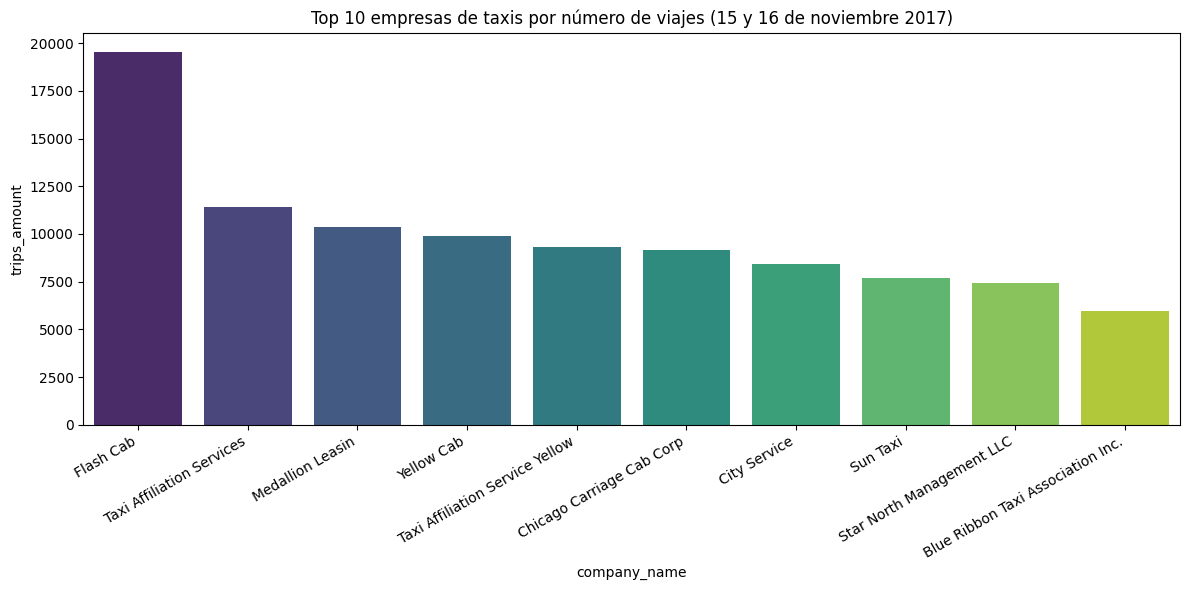

C:\Users\malej\AppData\Local\Temp\ipykernel_21456\2846043800.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_neighborhoods, x='average_trips', y='dropoff_location_name', palette='magma')


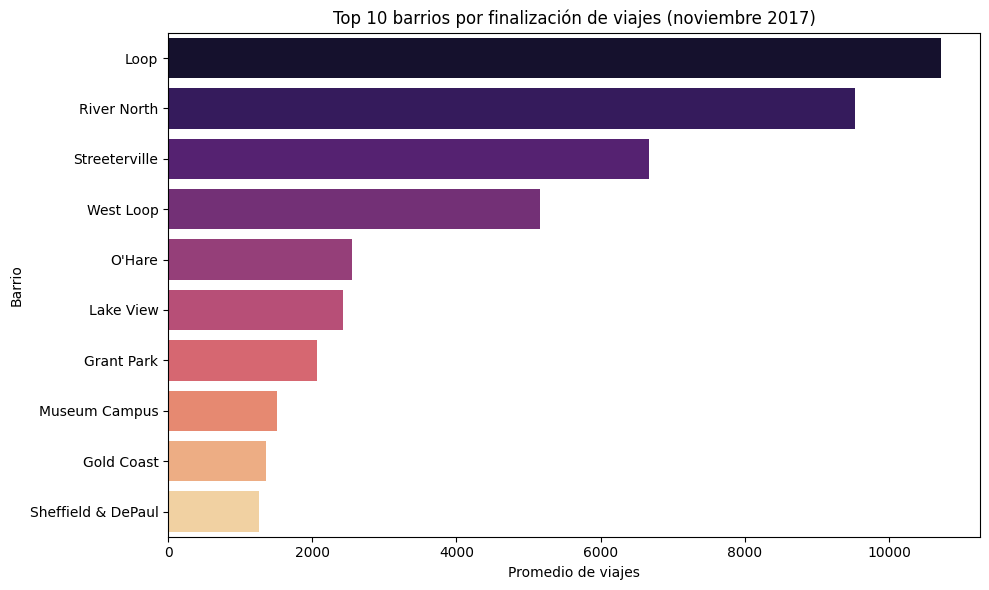

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Empresas de taxis y número de viajes
top10_companies = df01.sort_values('trips_amount', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top10_companies, x='company_name', y='trips_amount', palette='viridis')
plt.title('Top 10 empresas de taxis por número de viajes (15 y 16 de noviembre 2017)')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# Top 10 barrios por número de finalizaciones
plt.figure(figsize=(10,6))
sns.barplot(data=top10_neighborhoods, x='average_trips', y='dropoff_location_name', palette='magma')
plt.title('Top 10 barrios por finalización de viajes (noviembre 2017)')
plt.xlabel('Promedio de viajes')
plt.ylabel('Barrio')
plt.tight_layout()
plt.show()

# 5. Conclusiones de los gráficos


### Empresas de taxis con más viajes:
Las empresas con mayor número de viajes durante el 15 y 16 de noviembre de 2017 son, en orden descendente: Flash Cab, Taxi Affiliation Services, Medallion Leasing, Yellow Cab y Taxi Affiliation Service Yellos. Esto indica que el mercado está dominado por unas pocas compañías grandes, lo que sugiere una concentración significativa en el sector.

### Barrios con más finalizaciones de viajes:
Los barrios con mayor promedio de finalización de viajes en noviembre de 2017 son: Loop, River North, Streeterville, West Loop y O'Hare. Estos barrios corresponden a zonas céntricas, comerciales y de alto tránsito en Chicago, así como el principal aeropuerto de la ciudad.

### Patrones observados:

Existe una clara concentración de viajes en el centro de la ciudad y zonas de interés económico y turístico.
El aeropuerto O'Hare aparece entre los principales destinos, lo que resalta la importancia del transporte hacia y desde el aeropuerto.
El dominio de unas pocas empresas sugiere que los usuarios tienden a preferir compañías reconocidas o que estas tienen mayor capacidad operativa.
La distribución de los viajes refleja la dinámica urbana de Chicago, donde el centro y las zonas de negocios concentran la mayor demanda de servicios de taxi.

# 6. Prueba de hipótesis


### Estadísticas descriptivas de la duración de los viajes

Antes de realizar la prueba de hipótesis, es importante conocer algunos estadísticos descriptivos de la variable de interés. La **duración promedio** de los viajes del Loop al aeropuerto O'Hare en fines de semana y su **desviación estándar** nos permiten entender la tendencia central y la dispersión de los datos. Esto ayuda a interpretar mejor los resultados de la prueba estadística y a contextualizar si la diferencia con el valor de referencia (30 minutos) es relevante en términos prácticos.

In [31]:
# Asegúrate de crear la columna antes de calcular estadísticas
df07['duration_min'] = df07['duration_seconds'] / 60

media = df07['duration_min'].mean()
desviacion = df07['duration_min'].std()
print(f"Duración promedio de los viajes (min): {media:.2f}")
print(f"Desviación estándar de la duración (min): {desviacion:.2f}")

Duración promedio de los viajes (min): 34.53
Desviación estándar de la duración (min): 12.82


In [32]:
from scipy import stats

# Duraciones en minutos (solo fines de semana)
weekend = df07['duration_min']

# Prueba t de una muestra
stat, p = stats.ttest_1samp(weekend, 30)
print(f'Estadístico: {stat}, p-valor: {p}')

if p < 0.05:
    print("Rechazamos la hipótesis nula: la duración promedio SÍ es diferente a 30 minutos.")
else:
    print("No se rechaza la hipótesis nula: la duración promedio NO es diferente a 30 minutos.")

Estadístico: 11.540870477741613, p-valor: 4.0500570131104564e-29
Rechazamos la hipótesis nula: la duración promedio SÍ es diferente a 30 minutos.


# 7. Explicación y criterios de la prueba de hipótesis

### Criterio y elección de la prueba:
Se utilizó la prueba t de una muestra (scipy.stats.ttest_1samp) para comparar la duración promedio de los viajes en fines de semana con un valor de referencia de 30 minutos. Esta prueba es adecuada cuando se desea comparar la media de una muestra contra un valor específico y se asume que los datos tienen una distribución aproximadamente normal. Dado que la muestra es suficientemente grande, la prueba t es robusta incluso si la normalidad no es perfecta.

### Interpretación del p-valor:
El p-valor obtenido fue extremadamente bajo (4.05e-29), mucho menor que el nivel de significancia habitual (α = 0.05). Esto indica que la probabilidad de observar una diferencia tan grande (o mayor) entre la media muestral y el valor de referencia (30 minutos) solo por azar es prácticamente nula.

### Conclusión:
Se rechaza la hipótesis nula. Por lo tanto, la duración promedio de los viajes del Loop al aeropuerto O'Hare en fines de semana sí es significativamente diferente a 30 minutos.